# What is HDF?

* it stands for Hierarchical Data Format
* allows for organizing data
* especially useful for large amounts of data (has a binary format)
* NeXus files are hdf5 files
* one can use hdfview or NeXpy to look at the content

<img src='hdfview.png'>

* the information is organized in groups and datasets
* one can have attributes to describe each field

For more information, go to https://portal.hdfgroup.org/display/HDF5/HDF5

In [1]:

!ls ../Data/HDF

HB2C_143233.nxs.h5  HYS_13656_event.nxs  HYS_181000.nxs.h5


h5py is a library for working with hdf5 files
open an instance to the hdf 5 file with the File command.

In [2]:
import h5py

f=h5py.File('../Data/HDF/HB2C_143233.nxs.h5', 'r')

use the keys method to access the file

In [3]:
list(f.keys())

['entry']

entry is the base level.  let's use that to look at the keys below it.

In [4]:
list(f['entry'].keys())

['DASlogs',
 'Software',
 'bank1_events',
 'bank2_events',
 'bank3_events',
 'bank4_events',
 'bank5_events',
 'bank6_events',
 'bank7_events',
 'bank8_events',
 'bank_error_events',
 'bank_unmapped_events',
 'definition',
 'duration',
 'end_time',
 'entry_identifier',
 'experiment_identifier',
 'experiment_title',
 'instrument',
 'notes',
 'proton_charge',
 'raw_frames',
 'run_number',
 'sample',
 'start_time',
 'title',
 'total_counts',
 'total_other_counts',
 'total_pulses',
 'total_uncounted_counts',
 'user1',
 'user10',
 'user11',
 'user12',
 'user13',
 'user14',
 'user2',
 'user3',
 'user4',
 'user5',
 'user6',
 'user7',
 'user8',
 'user9']

Let's look in the DASlogs

In [5]:
# one can use compound path
list(f['entry/DASlogs'].keys())
    

['Device11:Enum:enum_01',
 'Device11:Enum:enum_02',
 'HB2C:CS:CrystalAlign:UBMatrix',
 'HB2C:CS:ITEMS',
 'HB2C:CS:ITEMS:CanBarcode',
 'HB2C:CS:ITEMS:CanIndicator',
 'HB2C:CS:ITEMS:CanMaterials',
 'HB2C:CS:ITEMS:CanName',
 'HB2C:CS:ITEMS:Comments',
 'HB2C:CS:ITEMS:Component',
 'HB2C:CS:ITEMS:Container',
 'HB2C:CS:ITEMS:ContainerId',
 'HB2C:CS:ITEMS:Density',
 'HB2C:CS:ITEMS:DensityUnits',
 'HB2C:CS:ITEMS:Description',
 'HB2C:CS:ITEMS:Formula',
 'HB2C:CS:ITEMS:HeightInContainer',
 'HB2C:CS:ITEMS:HeightInContainerUnits',
 'HB2C:CS:ITEMS:InteriorDepth',
 'HB2C:CS:ITEMS:InteriorDepthUnits',
 'HB2C:CS:ITEMS:InteriorDiameter',
 'HB2C:CS:ITEMS:InteriorDiameterUnits',
 'HB2C:CS:ITEMS:InteriorHeight',
 'HB2C:CS:ITEMS:InteriorHeightUnits',
 'HB2C:CS:ITEMS:InteriorWidth',
 'HB2C:CS:ITEMS:InteriorWidthUnits',
 'HB2C:CS:ITEMS:LatticeA',
 'HB2C:CS:ITEMS:LatticeAlpha',
 'HB2C:CS:ITEMS:LatticeB',
 'HB2C:CS:ITEMS:LatticeBeta',
 'HB2C:CS:ITEMS:LatticeC',
 'HB2C:CS:ITEMS:LatticeGamma',
 'HB2C:CS:ITEMS:Mas

let's extract the units and values of the s1 motor

In [6]:
temp=f['entry/DASlogs/HB2C:SE:SampleTemp']

what is available for SampleTemp?

In [7]:
list(temp.keys())

['average_value',
 'average_value_error',
 'device_id',
 'device_name',
 'maximum_value',
 'minimum_value',
 'time',
 'value']

let's look at the average value


In [8]:
av=temp['average_value']

In [9]:
print(av.name)
av.value

/entry/DASlogs/HB2C:SE:SampleTemp/average_value


array([ 292.42611429])

Let's get the values of the array

In [10]:
temp_value=temp['value'].value

So we now have an array

In [11]:
temp_value

array([ 292.854,  292.843,  292.831,  292.819,  292.808,  292.796,
        292.784,  292.772,  292.761,  292.749,  292.738,  292.725,
        292.713,  292.701,  292.688,  292.678,  292.666,  292.654,
        292.641,  292.627,  292.615,  292.602,  292.589,  292.577,
        292.563,  292.553,  292.541,  292.528,  292.517,  292.504,
        292.492,  292.479,  292.466,  292.452,  292.437,  292.425,
        292.412,  292.399,  292.386,  292.373,  292.36 ,  292.347,
        292.335,  292.321,  292.305,  292.293,  292.28 ,  292.268,
        292.256,  292.242,  292.23 ,  292.217,  292.202,  292.189,
        292.174,  292.162,  292.15 ,  292.138,  292.125,  292.11 ,
        292.098,  292.084,  292.07 ,  292.057,  292.042,  292.03 ,
        292.017,  292.003,  291.99 ,  291.975])

In [12]:
temp_value.shape

(70,)

In [13]:
list (temp['value'].attrs.keys())

['units']

Let's look at the units

In [14]:
temp['value'].attrs['units']

b'K'

what is the b?   It stands for byte.  The string from the nexus file needs to be converted into the python string format.  This is because python supports beyond ASCII character sets.

In [15]:
value_u=str(temp['value'].attrs['units'],'utf-8')

No for the time to go with the values

In [16]:
temp_time=temp['time'].value

In [17]:
temp_time.shape

(70,)

In [18]:
list(temp['time'].attrs.keys())

['units', 'start', 'offset_seconds', 'offset_nanoseconds']

In [19]:
time_u=str(temp['time'].attrs['units'],'utf-8')

In [20]:
time_u

'second'

Plot value vs. time

<IPython.core.display.Javascript object>


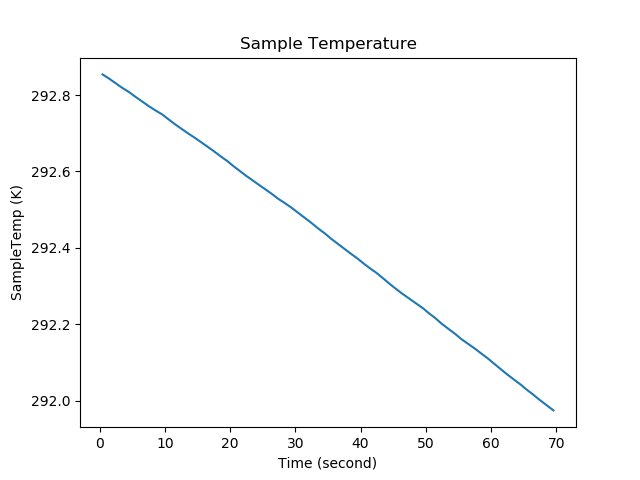

Text(0,0.5,'SampleTemp (K)')

In [21]:
%matplotlib notebook
import matplotlib.pyplot as plt

fig,ax = plt.subplots()
ax.plot(temp_time,temp_value)
ax.set_title('Sample Temperature')
ax.set_xlabel('Time ({})'.format(time_u))
ax.set_ylabel('SampleTemp ({})'.format(value_u))

to find the absolute start time

In [22]:
temp['time'].attrs['start']

b'2019-01-08T15:27:53.933333333-05:00'

In [23]:
f.close()